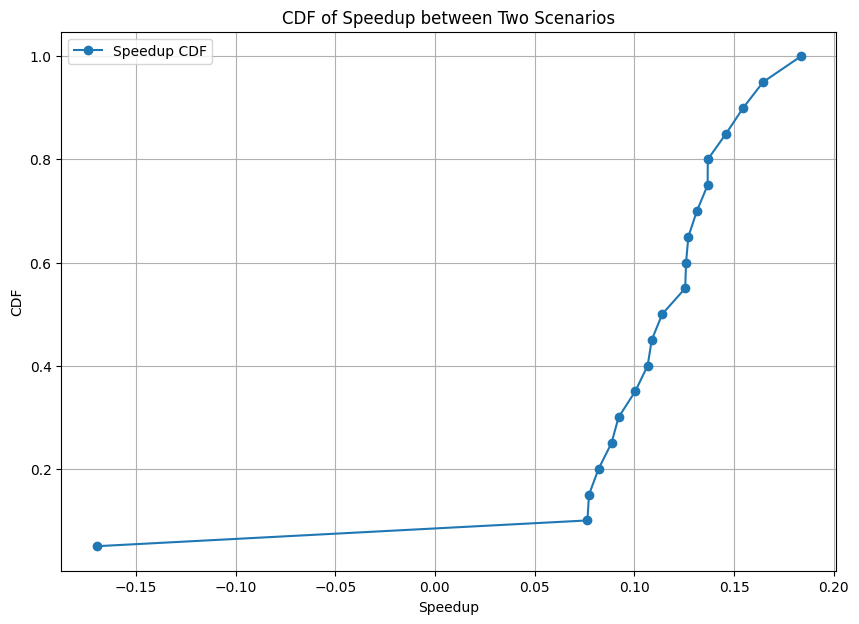

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json

# Load the first dataset from the JSON file
with open('experiment_results.json') as f1:
    data_scenario1 = json.load(f1)

# Load the second dataset from the JSON file
with open('experiment_results111.json') as f2:
    data_scenario2 = json.load(f2)

# Extract durations (latencies) for scenario 1
durations_scenario1 = [data_scenario1['activations'][key]['duration'] for key in data_scenario1['activations']]

# Extract durations (latencies) for scenario 2
durations_scenario2 = [data_scenario2['activations'][key]['duration'] for key in data_scenario2['activations']]

# Ensure that both scenarios have the same number of requests
if len(durations_scenario1) != len(durations_scenario2):
    raise ValueError("The two scenarios must have the same number of requests to compute speedup.")

# Compute speedup: (t_scenario1 - t_scenario2) / t_scenario1
speedup = [(t1 - t2) / t1 for t1, t2 in zip(durations_scenario1, durations_scenario2)]

# Sort speedup for CDF
sorted_speedup = np.sort(speedup)

# CDF for speedup
cdf_speedup = np.arange(1, len(sorted_speedup) + 1) / len(sorted_speedup)

# Plot CDF of speedup
plt.figure(figsize=(10, 7))
plt.plot(sorted_speedup, cdf_speedup, label='Speedup CDF', marker='o')
plt.xlabel('Speedup')
plt.ylabel('CDF')
plt.title('CDF of Speedup between Two Scenarios')
plt.grid(True)
plt.legend()
plt.show()
